# Migration vs Deaths in Armed Conflicts

## Introduction
This document presents an analysis of migration patterns and deaths in armed conflicts. It includes data on:
- The share of the population born in another country.
- The share of the population that has left their home country.
- Deaths in armed conflicts based on location.

## Data Sources
The data used in this analysis comes from multiple sources, tracking global migration trends and conflict-related deaths.

- **Migration Data:**
  - Share of the population that was born in another country.
  - Share of the population that has left the country.

- **Conflict Data:**
  - Deaths in armed conflicts based on where they occurred.


In [22]:
# Import dependencies
import requests
import time
import json
import os
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [23]:
# Load the data
born_in_another_country = pd.read_csv("./Resources/share-of-the-population-that-was-born-in-another-country.csv")
left_the_country = pd.read_csv("./Resources/share-of-the-population-that-has-left-the-country.csv")
armed_conflicts_deaths = pd.read_csv("./Resources/deaths-in-armed-conflicts-based-on-where-they-occurred.csv")


In [24]:
# Rename the columns so stuffs easier to read
born_in_another_country.rename(columns={
    "Share of the population that was born in another country": "Born in (%)"
}, inplace=True)
left_the_country.rename(columns={
    "Share of the population that was born in this country but now lives in another country.": "Left (%)"
}, inplace=True)
armed_conflicts_deaths.rename(columns={
    "Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all": "Conflict Deaths"
}, inplace=True)

In [25]:
# Merge all this stuff
# Merge the "born_in_another_country" and "left_the_country" datasets on "Entity" and "Year"
merged_data = pd.merge(born_in_another_country, left_the_country, on=["Entity", "Year"])

# Merge the result with the "armed_conflicts_deaths" dataset
merged_data = pd.merge(merged_data, armed_conflicts_deaths, on=["Entity", "Year"])

In [26]:
# Calculate the net migration (%)
# Net Migration = Born in (%) - Left (%)
merged_data["Net Migration (%)"] = merged_data["Born in (%)"] - merged_data["Left (%)"]

In [6]:
# Filter for these random and non-hand-picked countries for no particular reason
countries_to_plot = ["Afghanistan", "Syria", "Iraq", "Somalia", "Sudan"]
filtered_data = merged_data[merged_data["Entity"].isin(countries_to_plot)]

<Figure size 640x480 with 0 Axes>

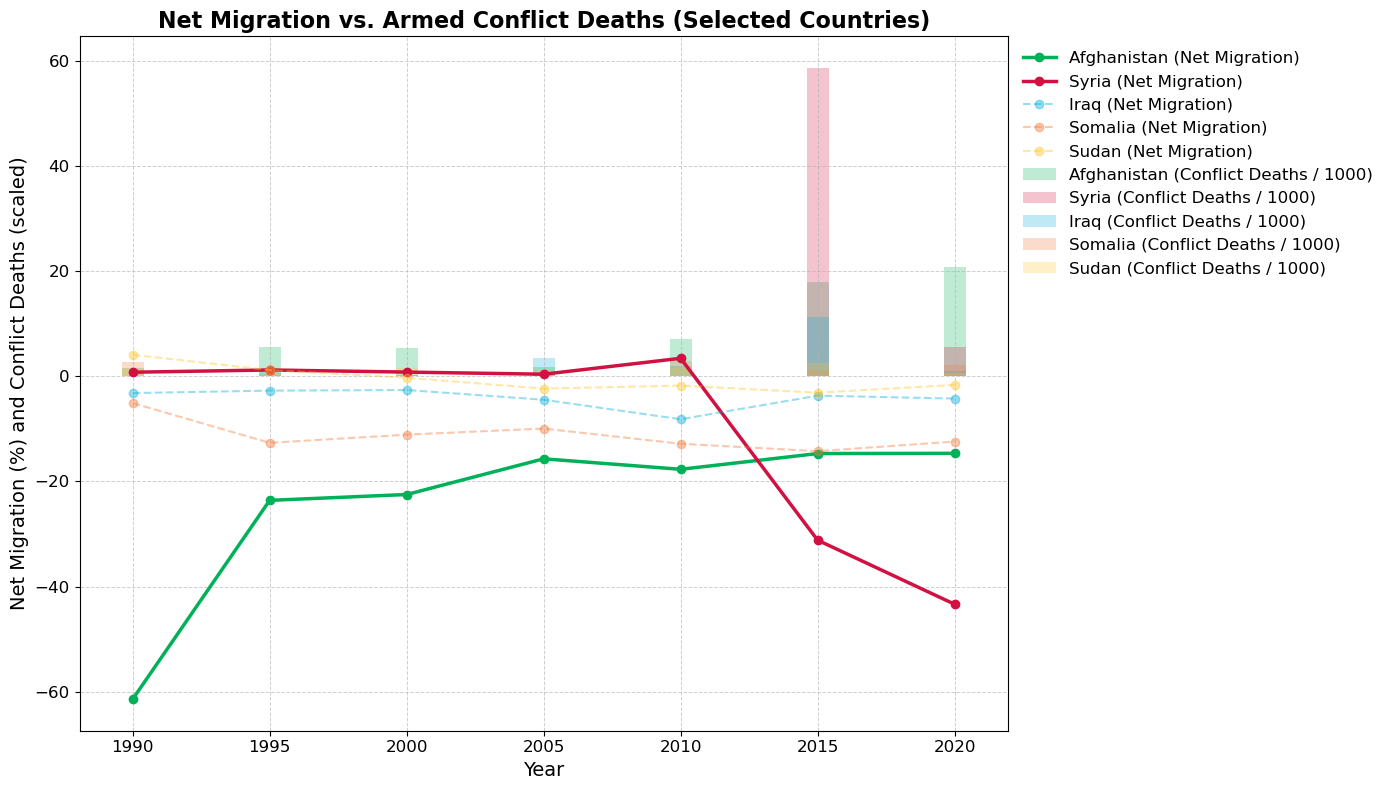

In [17]:
import matplotlib.pyplot as plt

# Clear figure
plt.clf()
plt.figure(figsize=(14, 8))

# Define color palette
colors = {
    "Afghanistan": "#00b159",  # Green
    "Syria": "#d11141",       # Bright Red
    "Iraq": "#00aedb",        # Light Blue
    "Somalia": "#f37735",     # Orange
    "Sudan": "#ffc425"        # Yellow
}

# Define line visibility settings
emphasized_countries = ["Afghanistan", "Syria"]  # Key trends
deemphasized_countries = ["Iraq", "Somalia", "Sudan"]  # Flat trends

# Plot Net Migration (%) with adjusted opacity
for country in countries_to_plot:
    country_data = filtered_data[filtered_data["Entity"] == country]
    
    # Set transparency & linestyle based on importance
    if country in emphasized_countries:
        alpha, linestyle, linewidth = 1.0, "-", 2.5  # Full visibility
    else:
        alpha, linestyle, linewidth = 0.4, "--", 1.5  # Deemphasized lines
    
    plt.plot(
        country_data["Year"], 
        country_data["Net Migration (%)"], 
        label=f"{country} (Net Migration)", 
        marker='o',
        linestyle=linestyle, 
        linewidth=linewidth, 
        markersize=6,
        color=colors[country], 
        alpha=alpha  # Adjusted opacity
    )
    
    # Keep conflict deaths bars at low transparency
    plt.bar(
        country_data["Year"], 
        country_data["Conflict Deaths"] / 1000, 
        alpha=0.25,  
        color=colors[country], 
        label=f"{country} (Conflict Deaths / 1000)"
    )

# Enhance styling
plt.title("Net Migration vs. Armed Conflict Deaths (Selected Countries)", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Net Migration (%) and Conflict Deaths (scaled)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.6)

# Improve legend placement
plt.legend(loc="upper left", bbox_to_anchor=(1,1), fontsize=12, frameon=False)
plt.tight_layout()

# Show plot
plt.show()


In [27]:
# OPTIONAL: Filter for countries of interest based on highest deaths

# RUN AFTER YOU CALCULATE NET MIGRATION & BEFORE "countries_to_plot ="

# Group by country and calculate total conflict deaths, then sort these mfs
country_death_totals = merged_data.groupby("Entity")["Conflict Deaths"].sum().sort_values(ascending=False)
top_countries = country_death_totals.head(5).index.tolist()
filtered_data = merged_data[merged_data["Entity"].isin(top_countries)]

<Figure size 640x480 with 0 Axes>

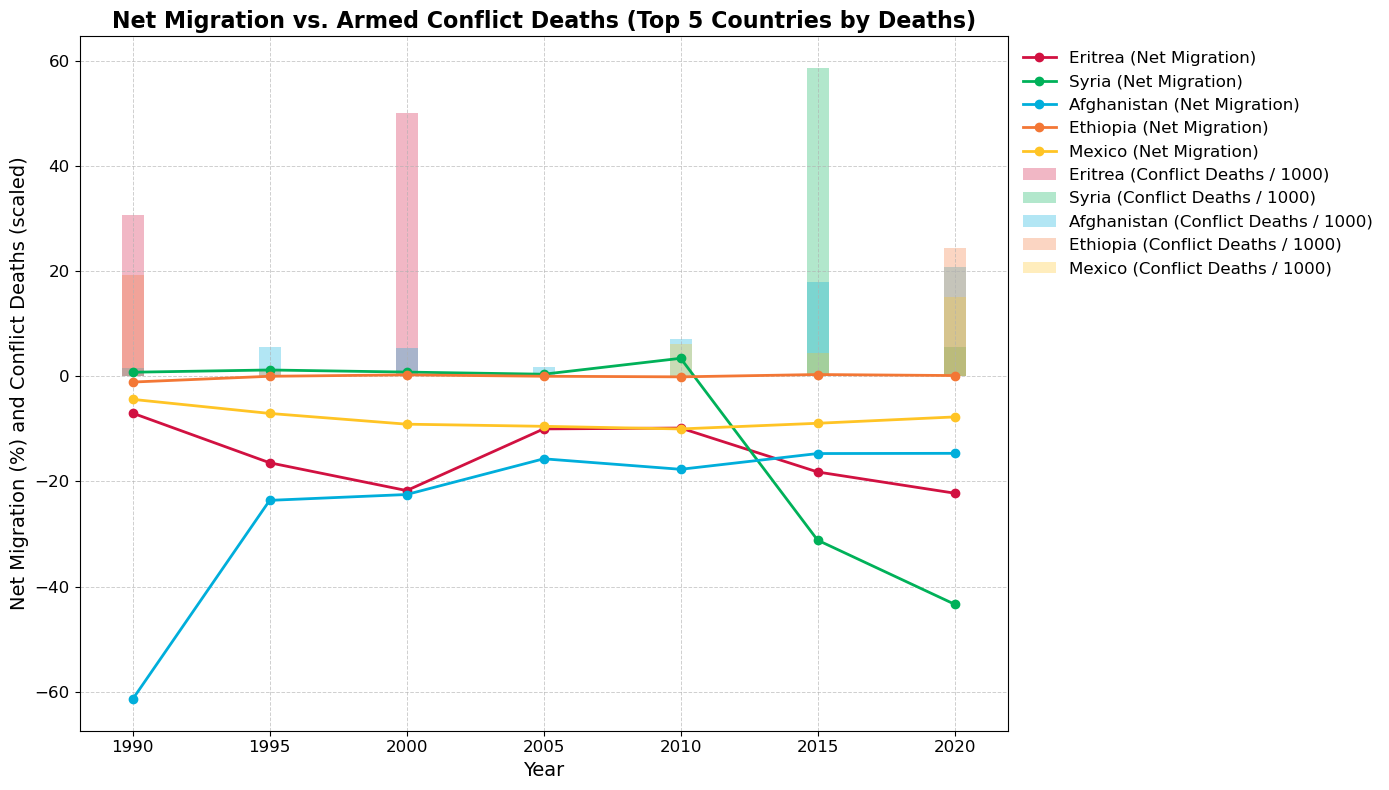

In [ ]:
# Clear figure
plt.clf()
plt.figure(figsize=(14, 8))

# Define the new colors based on top conflict deaths ranking
colors = {
    top_countries[0]: "#d11141",  # Bright Red (1st highest death country)
    top_countries[1]: "#00b159",  # Green (2nd highest death country)
    top_countries[2]: "#00aedb",  # Light Blue (3rd highest death country)
    top_countries[3]: "#f37735",  # Orange (4th highest death country)
    top_countries[4]: "#ffc425"   # Yellow (5th highest death country)
}

# Plot Net Migration (%) as a line chart and overlay Conflict Deaths as bars
for country in top_countries:
    country_data = filtered_data[filtered_data["Entity"] == country]
    
    plt.plot(
        country_data["Year"], 
        country_data["Net Migration (%)"], 
        label=f"{country} (Net Migration)", 
        marker='o',
        linestyle='-', 
        linewidth=2, 
        markersize=6,
        color=colors[country]  # Use assigned colors
    )
    
    plt.bar(
        country_data["Year"], 
        country_data["Conflict Deaths"] / 1000, 
        alpha=0.3, 
        color=colors[country], 
        label=f"{country} (Conflict Deaths / 1000)"
    )

# Customize the chart
plt.title("Net Migration vs. Armed Conflict Deaths (Top 5 Countries by Deaths)", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Net Migration (%) and Conflict Deaths (scaled)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.6)

# Improve legend placement
plt.legend(loc="upper left", bbox_to_anchor=(1,1), fontsize=12, frameon=False)
plt.tight_layout()

# Display the chart
plt.show()


<Figure size 640x480 with 0 Axes>

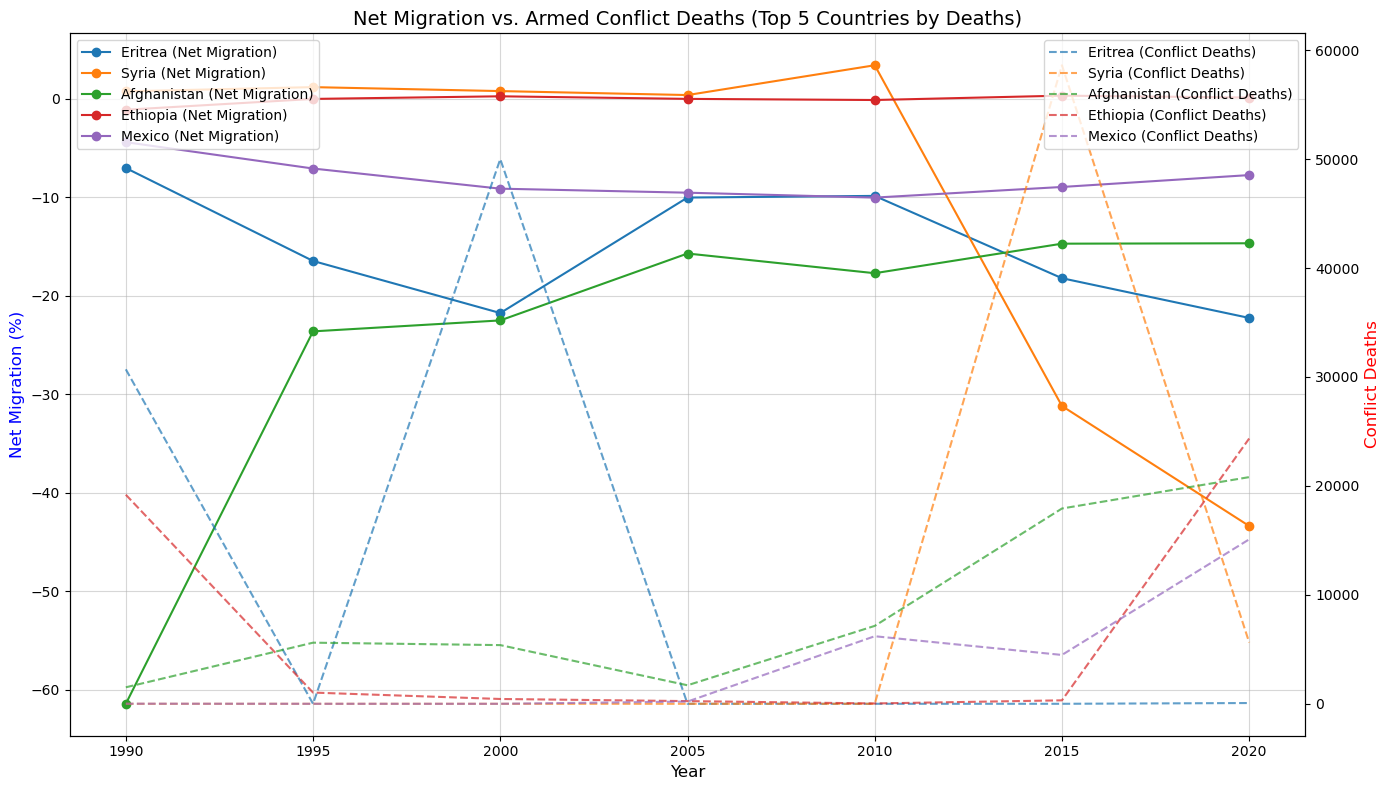

In [ ]:
# Different graph with the goal of showing a better representation of the death data. (It was worse and this was a waste of time)

# Rename columns for easier handling
born_in_another_country.rename(columns={
    "Share of the population that was born in another country": "Born in (%)"
}, inplace=True)
left_the_country.rename(columns={
    "Share of the population that was born in this country but now lives in another country.": "Left (%)"
}, inplace=True)
armed_conflicts_deaths.rename(columns={
    "Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all": "Conflict Deaths"
}, inplace=True)

# Merge the datasets
# Merge the "born_in_another_country" and "left_the_country" datasets on "Entity" and "Year"
merged_data = pd.merge(born_in_another_country, left_the_country, on=["Entity", "Year"])

# Merge the result with the "armed_conflicts_deaths" dataset
merged_data = pd.merge(merged_data, armed_conflicts_deaths, on=["Entity", "Year"])

# Calculate Net Migration (%)
# Net Migration = Born in (%) - Left (%)
merged_data["Net Migration (%)"] = merged_data["Born in (%)"] - merged_data["Left (%)"]

# Filter for countries of interest based on highest deaths
# Group by country and calculate total conflict deaths, then sort
country_death_totals = merged_data.groupby("Entity")["Conflict Deaths"].sum().sort_values(ascending=False)
top_countries = country_death_totals.head(5).index.tolist()
filtered_data = merged_data[merged_data["Entity"].isin(top_countries)]

# Plot the data with a secondary y-axis for conflict deaths
plt.clf()
fig, ax1 = plt.subplots(figsize=(14, 8))
ax2 = ax1.twinx()  # Create a secondary y-axis

# Plot Net Migration (%) as a line chart
for country in top_countries:
    country_data = filtered_data[filtered_data["Entity"] == country]
    ax1.plot(
        country_data["Year"], 
        country_data["Net Migration (%)"], 
        label=f"{country} (Net Migration)", 
        marker='o'
    )

# Plot Conflict Deaths as dashed lines on the secondary y-axis
for country in top_countries:
    country_data = filtered_data[filtered_data["Entity"] == country]
    ax2.plot(
        country_data["Year"], 
        country_data["Conflict Deaths"], 
        linestyle='dashed', 
        alpha=0.7, 
        label=f"{country} (Conflict Deaths)"
    )

# Customize the chart
ax1.set_title("Net Migration vs. Armed Conflict Deaths (Top 5 Countries by Deaths)", fontsize=14)
ax1.set_xlabel("Year", fontsize=12)
ax1.set_ylabel("Net Migration (%)", fontsize=12, color='blue')
ax2.set_ylabel("Conflict Deaths", fontsize=12, color='red')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(alpha=0.5)
plt.tight_layout()

# Display it
plt.show()


## Key Findings
### Migration Trends
- **Armed Conflicts and Migration Are Interconnected**  
  - Armed conflicts often drive forced migration as people flee violence and instability.
  - Countries experiencing prolonged conflict typically see high emigration rates.
  - Nations with high immigration rates are often those offering political stability, economic opportunities, or refugee support programs.
- **Broader Implications**  
  - Understanding migration patterns can help predict and manage refugee crises.
  - Effective migration policies must address both push factors (conflict, instability) and pull factors (economic opportunity, safety).

## Armed Conflicts Conclusion
Deaths in armed conflicts serve as a key indicator of large-scale violence, which appears to have a direct impact on migration patterns. As conflicts escalate, populations are often forced to flee, leading to increased emigration from affected regions. Conversely, countries that experience stability tend to attract migrants seeking safety and opportunity. Understanding this relationship is essential for addressing the root causes of displacement and developing effective migration policies.

# Now lets look into Migration vs Terrorism

## Introduction
This section explores the relationship between migration patterns and terrorist activity. It examines how terrorism may influence both emigration (people leaving a country) and immigration (people moving in). By analyzing trends in terrorist attacks alongside migration data, we aim to understand whether terrorism significantly impacts global migration flows.

## Data Sources
The data used in this analysis includes:
- **Migration Data:**
  - Share of the population born in another country.
  - Share of the population that has left the country.
- **Terrorism Data:**
  - Number of terrorist attacks by country and year.

This dataset allows us to investigate whether countries experiencing high levels of terrorism also see increased emigration and whether terrorism affects a country’s ability to attract immigrants.


In [12]:
# Let's see what we're dealing with
terrorist_attacks = pd.read_csv("./Resources/terrorist-attacks.csv")

In [13]:
terrorist_attacks.sample(10)

,Entity,Code,Year,Terrorist attacks
2035,Comoros,COM,2000,0
9230,Trinidad and Tobago,TTO,1971,0
4448,International,NaN,1999,0
7400,Qatar,QAT,1977,0
7021,Panama,PAN,2007,0
3913,Guinea,GIN,1973,0
3684,Ghana,GHA,2000,0
2430,Denmark,DNK,2008,1
5863,Martinique,MTQ,2017,0
6672,Niger,NER,2015,41


<Figure size 640x480 with 0 Axes>

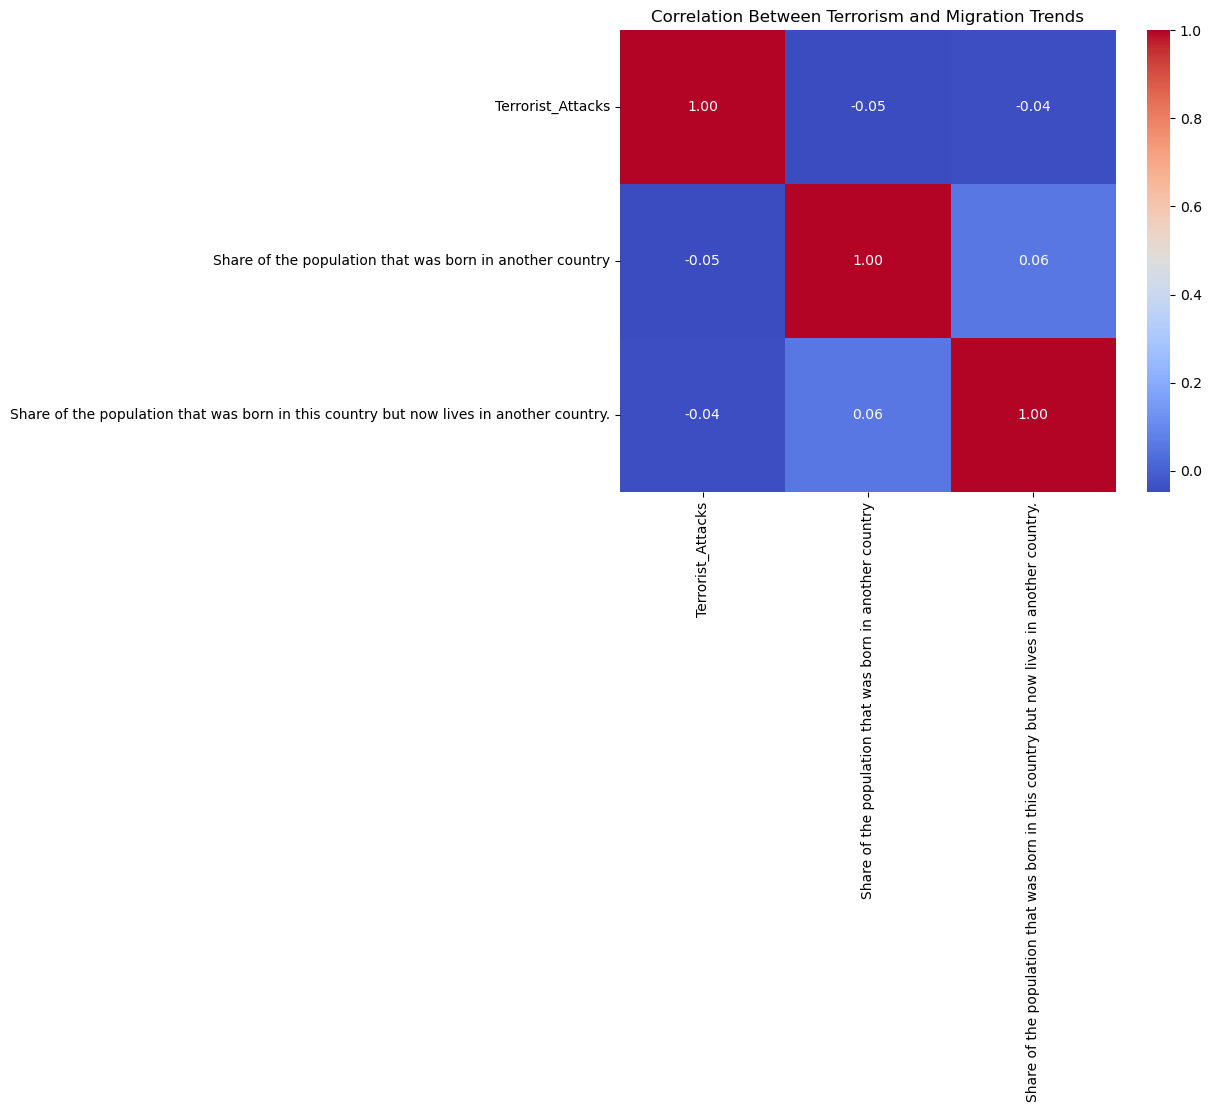

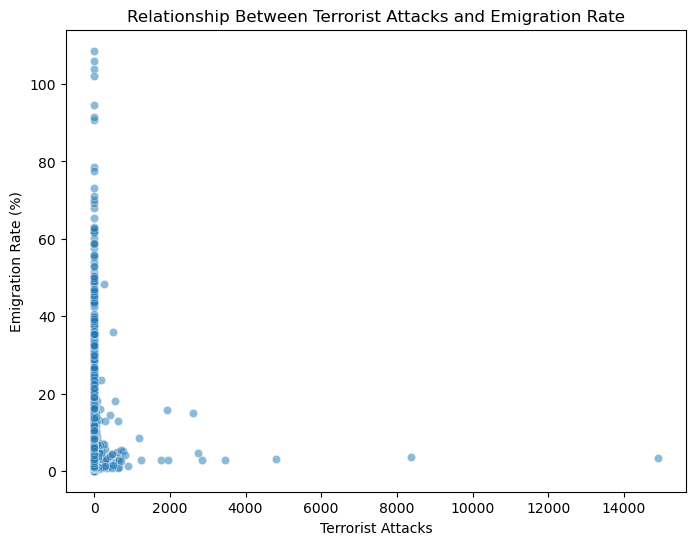

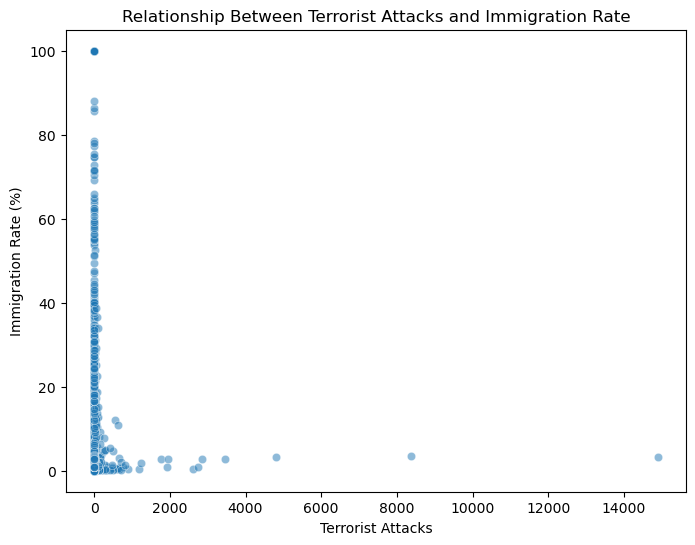

In [32]:
# Load datasets
terrorism_data = pd.read_csv("./Resources/terrorist-attacks.csv")
immigration_data = pd.read_csv("./Resources/share-of-the-population-that-was-born-in-another-country.csv")
emigration_data = pd.read_csv("./Resources/share-of-the-population-that-has-left-the-country.csv")

# Rename columns for consistency
terrorism_data.rename(columns={'Entity': 'Country', 'Terrorist attacks': 'Terrorist_Attacks'}, inplace=True)
immigration_data.rename(columns={'Entity': 'Country'}, inplace=True)
emigration_data.rename(columns={'Entity': 'Country'}, inplace=True)

# Merge datasets on 'Country' and 'Year'
merged_data = terrorism_data.merge(immigration_data, on=['Country', 'Year'], how='left')
merged_data = merged_data.merge(emigration_data, on=['Country', 'Year'], how='left')

# Drop missing values
merged_data.dropna(inplace=True)

# Use exact column names from your dataset
immigration_col = "Share of the population that was born in another country"
emigration_col = "Share of the population that was born in this country but now lives in another country."

# Compute correlation matrix
correlation_matrix = merged_data[['Terrorist_Attacks', immigration_col, emigration_col]].corr()

# Plot correlation heatmap
plt.clf()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Terrorism and Migration Trends")
plt.show()

# Scatter plot: Terrorist Attacks vs. Emigration Rate
plt.figure(figsize=(8,6))
sns.scatterplot(data=merged_data, x='Terrorist_Attacks', y=emigration_col, alpha=0.5)
plt.xlabel("Terrorist Attacks")
plt.ylabel("Emigration Rate (%)")
plt.title("Relationship Between Terrorist Attacks and Emigration Rate")
plt.show()

# Scatter plot: Terrorist Attacks vs. Immigration Rate
plt.figure(figsize=(8,6))
sns.scatterplot(data=merged_data, x='Terrorist_Attacks', y=immigration_col, alpha=0.5)
plt.xlabel("Terrorist Attacks")
plt.ylabel("Immigration Rate (%)")
plt.title("Relationship Between Terrorist Attacks and Immigration Rate")
plt.show()


## Improving Data Visualization

When analyzing the relationship between terrorism and migration, we noticed that the number of terrorist attacks varied significantly between countries. Some nations experienced only a few incidents per year, while others had thousands. This created a **highly skewed distribution**, making it difficult to observe trends in a standard scatter plot.

To address this, we applied the following adjustments:
- **Logarithmic Scale on Terrorist Attacks**  
  - Since terrorist attack counts span multiple orders of magnitude, a log scale spreads out the data, making patterns more visible.
- **Trend Line (Lowess Regression)**  
  - Helps visualize general trends without assuming a linear relationship.
- **Transparency Adjustments**  
  - Reduces overplotting in dense areas, improving readability.

These enhancements allow for a clearer interpretation of how terrorism levels might correlate with migration patterns.


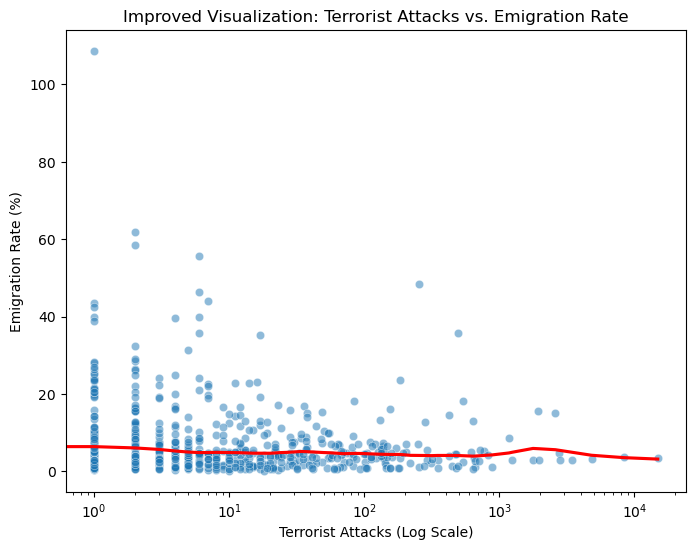

In [34]:
# Correct column name based on the dataset
emigration_col = "Share of the population that was born in this country but now lives in another country."

# Set up the figure
plt.figure(figsize=(8,6))

# Convert x-axis to log scale for better distribution
sns.scatterplot(data=merged_data, x='Terrorist_Attacks', y=emigration_col, alpha=0.5)
plt.xscale('log')  # Logarithmic scale for better visualization

# Add trend line (lowess regression curve)
sns.regplot(data=merged_data, x='Terrorist_Attacks', y=emigration_col, scatter=False, lowess=True, color="red")

# Labels and title
plt.xlabel("Terrorist Attacks (Log Scale)")
plt.ylabel("Emigration Rate (%)")
plt.title("Improved Visualization: Terrorist Attacks vs. Emigration Rate")
plt.show()



## Focusing on High-Impact Countries

To further investigate the relationship between terrorism and migration, we selected a group of **high-impact countries** that have experienced significant terrorist activity over the years. These countries—**Afghanistan, Syria, Iraq, Pakistan, and Nigeria**—were chosen based on their history of prolonged conflict and high numbers of terrorist attacks.

By analyzing these countries separately, we aim to:
- Identify whether increased terrorism corresponds with higher emigration rates.
- Compare trends across different regions to see if migration responses vary.
- Assess whether countries with frequent attacks experience declining immigration.

This focused approach helps reveal patterns that may not be as clear in the broader global dataset.


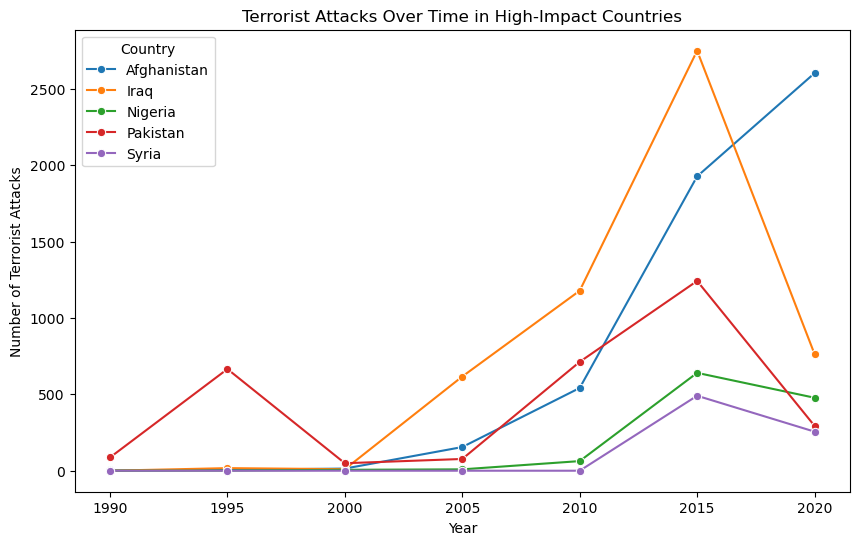

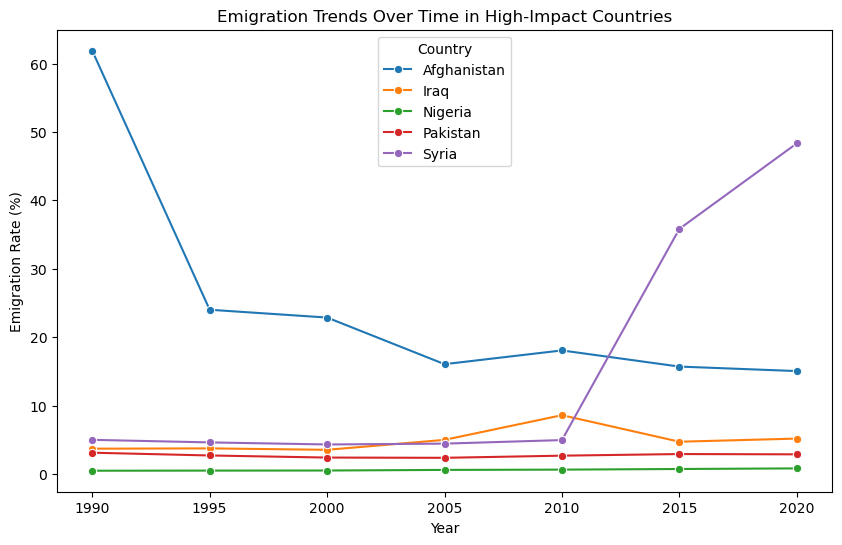

In [36]:
# Define high-terrorism impact countries
high_impact_countries = ["Afghanistan", "Syria", "Iraq", "Pakistan", "Nigeria"]

# Filter dataset for these countries
filtered_data = merged_data[merged_data["Country"].isin(high_impact_countries)]

# Visualize trends over time
plt.figure(figsize=(10,6))
sns.lineplot(data=filtered_data, x="Year", y="Terrorist_Attacks", hue="Country", marker="o")
plt.xlabel("Year")
plt.ylabel("Number of Terrorist Attacks")
plt.title("Terrorist Attacks Over Time in High-Impact Countries")
plt.legend(title="Country")
plt.show()

# Visualize emigration trends over time
plt.figure(figsize=(10,6))
sns.lineplot(data=filtered_data, x="Year", 
             y="Share of the population that was born in this country but now lives in another country.", 
             hue="Country", marker="o")
plt.xlabel("Year")
plt.ylabel("Emigration Rate (%)")
plt.title("Emigration Trends Over Time in High-Impact Countries")
plt.legend(title="Country")
plt.show()


## Combine the graphs to hopefully see some correlation

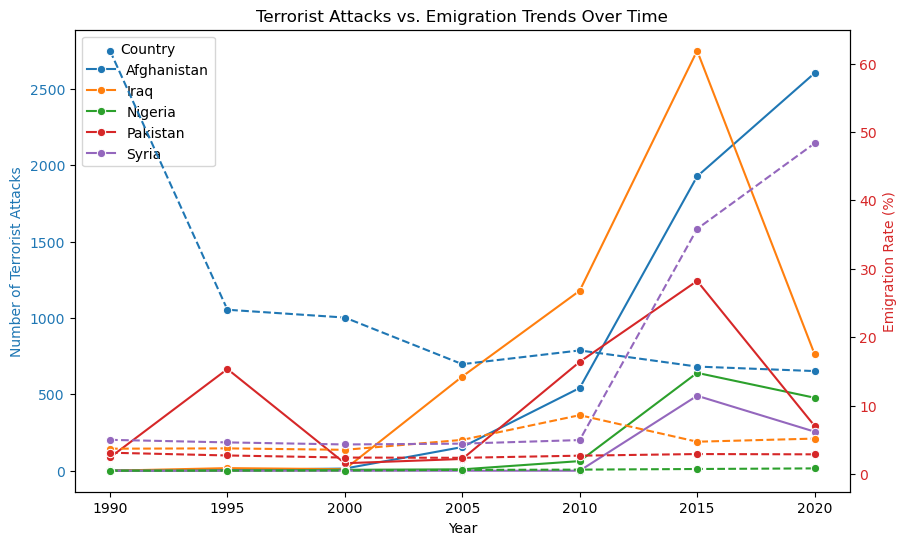

In [29]:
# Set up figure
fig, ax1 = plt.subplots(figsize=(10,6))

# Plot terrorist attacks on the left y-axis
sns.lineplot(data=filtered_data, x="Year", y="Terrorist_Attacks", hue="Country", marker="o", ax=ax1)
ax1.set_xlabel("Year")
ax1.set_ylabel("Number of Terrorist Attacks", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")

# Create a second y-axis for emigration
ax2 = ax1.twinx()
sns.lineplot(data=filtered_data, x="Year", 
             y="Share of the population that was born in this country but now lives in another country.", 
             hue="Country", marker="o", linestyle="dashed", ax=ax2, legend=False)
ax2.set_ylabel("Emigration Rate (%)", color="tab:red")
ax2.tick_params(axis="y", labelcolor="tab:red")

# Title
plt.title("Terrorist Attacks vs. Emigration Trends Over Time")

plt.show()


## Terrorism and Migration Conclusion

The analysis of high-impact countries and all countries reveals that while terrorism may contribute to migration, it is not the sole determining factor. 

### **Key Takeaways:**
- **Terrorism Trends:**  
  - Iraq and Afghanistan experienced major spikes in terrorism, particularly after 2010.  
  - Syria’s terrorism escalated sharply post-2010, likely due to the Syrian Civil War.  
  - Pakistan and Nigeria also faced rising attacks, but at lower levels than Iraq and Afghanistan.  

- **Emigration Patterns:**  
  - Afghanistan had a high emigration rate (~60%) in 1990, well before its peak in terrorist attacks.  
  - Syria’s emigration surged after 2010, closely aligning with increased terrorism and conflict.  
  - Iraq, despite significant terrorism, saw only a gradual rise in emigration.  
  - Pakistan and Nigeria had relatively stable emigration rates, suggesting that other factors, such as internal displacement, may play a role.  

### **Broader Implications:**
- **Terrorism alone does not fully drive migration.**  
  - While Syria’s emigration increase aligns with terrorism growth, Afghanistan’s emigration had already peaked before its major attacks.  
- **Larger conflicts and wars have a stronger impact.**  
  - Countries engaged in civil wars (e.g., Syria, Afghanistan) saw the highest emigration rates.  
  - In contrast, Nigeria and Pakistan, despite high terrorism levels, did not experience mass migration, possibly due to internal displacement rather than cross-border movement.  

Understanding the **complex relationship between terrorism, conflict, and migration** is essential for policymakers and humanitarian organizations. While terrorism can be a push factor for migration, **broader conflict dynamics and political instability** play a much larger role in determining migration patterns.
